Dataset loaded with 18846 documents and 20 categories.
Model training completed.
Accuracy: 0.88
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.89      0.88       151
           comp.graphics       0.73      0.83      0.78       202
 comp.os.ms-windows.misc       0.81      0.81      0.81       195
comp.sys.ibm.pc.hardware       0.68      0.75      0.71       183
   comp.sys.mac.hardware       0.85      0.81      0.83       205
          comp.windows.x       0.88      0.84      0.86       215
            misc.forsale       0.81      0.78      0.79       193
               rec.autos       0.89      0.92      0.90       196
         rec.motorcycles       0.96      0.93      0.95       168
      rec.sport.baseball       0.93      0.93      0.93       211
        rec.sport.hockey       0.95      0.95      0.95       198
               sci.crypt       0.97      0.95      0.96       201
         sci.electroni

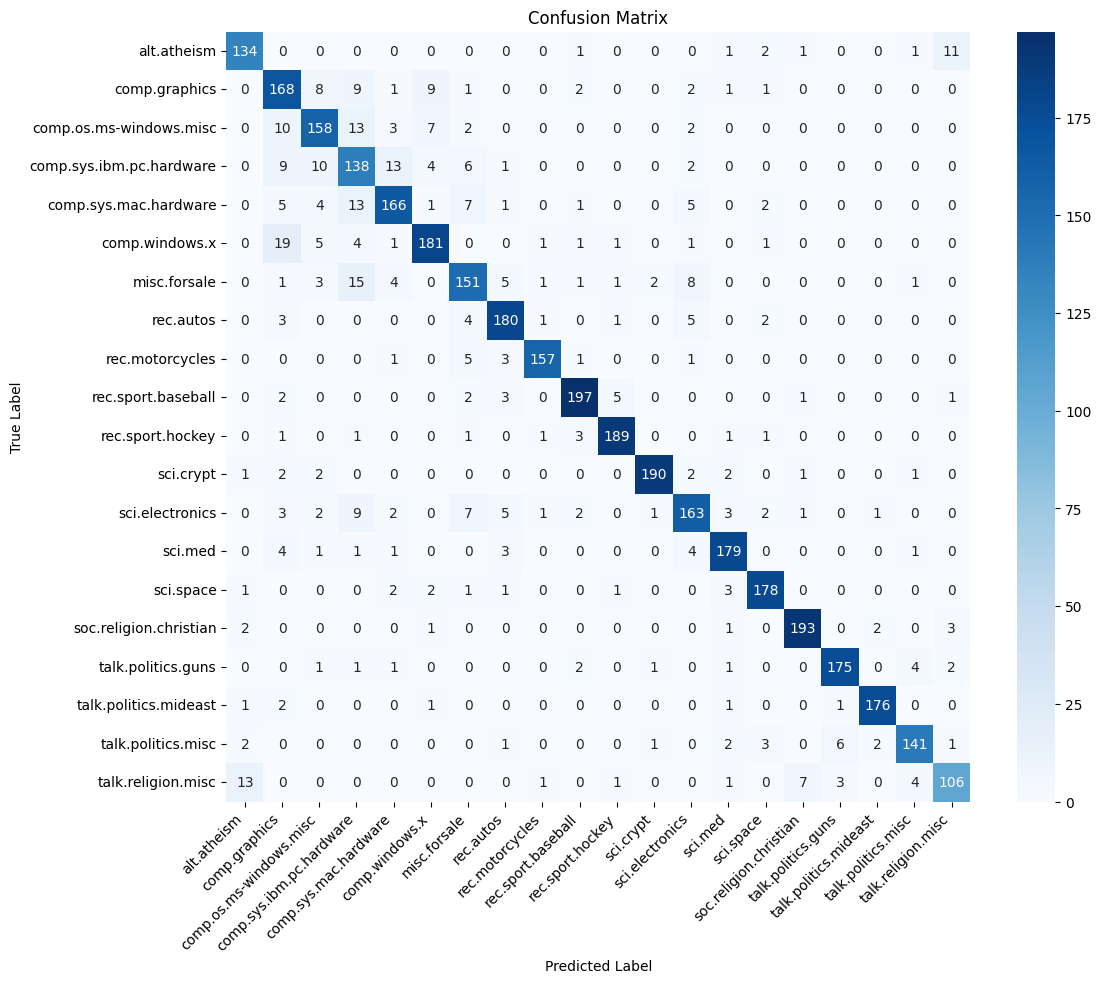

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the 20 Newsgroups dataset
news_train = fetch_20newsgroups(subset='all', shuffle=True)
print(f"Dataset loaded with {len(news_train.data)} documents and {len(news_train.target_names)} categories.")

# 2. Preprocess the data and extract features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(news_train.data)
y = news_train.target

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train an SVM model with a linear kernel
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
print("Model training completed.")

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 7. Classification report
report = classification_report(y_test, y_pred, target_names=news_train.target_names)
print("Classification Report:")
print(report)

# 8. Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=news_train.target_names, yticklabels=news_train.target_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
